<a href="https://colab.research.google.com/github/ShubhasmitaDash/SKILLLabANDProject/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy import stats
import time

In [2]:
# Load iris data and store in dataframe

from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
df=iris.frame
df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
# Separate X and y data

X = df.drop(labels='target',axis=1)
y = df['target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:


def minkowski_distance(a, b, p=1):

    distance = np.sum(np.abs(a-b)**p)**(1/p)

    return distance

minkowski_distance(a=np.asarray(X.iloc[0]), b=[4.8, 2.7, 2.5, 0.7], p=1)

np.float64(2.6999999999999997)

In [6]:
np.asarray(X.iloc[5])

array([5.4, 3.9, 1.7, 0.4])

In [7]:


test_pt = [4.8, 2.7, 2.5, 0.7]

distances = []

for (t_pt,t_class) in zip(X.values,y.values):
  dist = minkowski_distance(t_pt, test_pt)
  distances.append((dist,t_class))

distances

[(np.float64(2.6999999999999997), np.int64(0)),
 (np.float64(2.0000000000000004), np.int64(0)),
 (np.float64(2.2999999999999994), np.int64(0)),
 (np.float64(2.1), np.int64(0)),
 (np.float64(2.7), np.int64(0)),
 (np.float64(2.9000000000000004), np.int64(0)),
 (np.float64(2.4), np.int64(0)),
 (np.float64(2.4), np.int64(0)),
 (np.float64(2.1999999999999993), np.int64(0)),
 (np.float64(2.1000000000000005), np.int64(0)),
 (np.float64(3.1000000000000005), np.int64(0)),
 (np.float64(2.0999999999999996), np.int64(0)),
 (np.float64(2.0), np.int64(0)),
 (np.float64(2.8), np.int64(0)),
 (np.float64(4.1), np.int64(0)),
 (np.float64(3.9000000000000004), np.int64(0)),
 (np.float64(3.3), np.int64(0)),
 (np.float64(2.5999999999999996), np.int64(0)),
 (np.float64(3.1999999999999997), np.int64(0)),
 (np.float64(2.7999999999999994), np.int64(0)),
 (np.float64(2.6000000000000005), np.int64(0)),
 (np.float64(2.5999999999999996), np.int64(0)),
 (np.float64(3.1), np.int64(0)),
 (np.float64(1.8999999999999995

In [8]:

distances.sort(key=lambda x: x[0])

neighbours = list()
for i in range(5):
  neighbours.append(distances[i][1])
neighbours

[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0)]

In [9]:
from collections import Counter

counter = Counter(neighbours)

counter.most_common()[0][0]

np.int64(1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
type(X_test)

numpy.ndarray

In [12]:

def knn_predict(X_train, X_test, y_train, y_test, k, p):
  y_hat_test = []
  for test_pt in X_test:
    distances = []
    for (t_pt,t_class) in zip(X_train,y_train.values):
      dist = minkowski_distance(t_pt, test_pt, p)
      distances.append((dist,t_class))
    distances.sort(key=lambda x: x[0])

    neighbours = list()
    for i in range(k):
      neighbours.append(distances[i][1])

    counter = Counter(neighbours)


    prediction = counter.most_common()[0][0]

    y_hat_test.append(prediction)

  return y_hat_test


In [13]:

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=7, p=1)

print(y_hat_test)

[np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(0), np.int64(1), np.int64(0)]


In [14]:

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.9736842105263158


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat_test))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [17]:

accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))


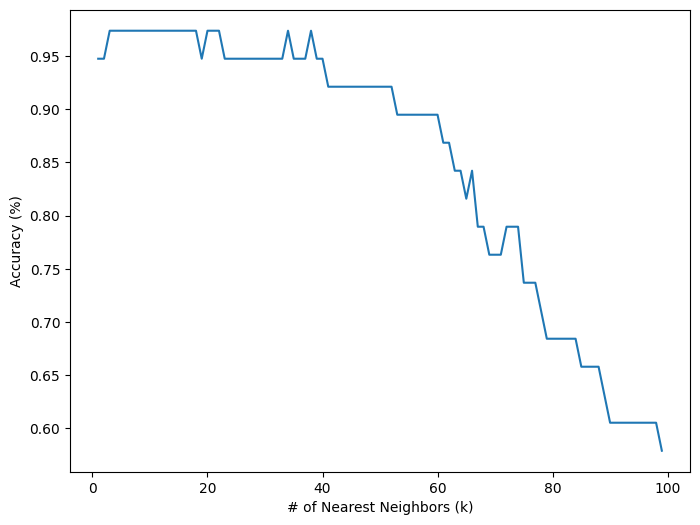

In [18]:
# Plot the results

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

In [19]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 1. Load dataset (Iris example)
# -----------------------------
iris = load_iris()
X = iris.data       # features
y = iris.target     # labels

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. Create and train KNN model
# -----------------------------
k = 5  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# -----------------------------
# 3. Make predictions
# -----------------------------
y_pred = knn.predict(X_test)

# -----------------------------
# 4. Evaluate model
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f" Model accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 5. Predict new data
# -----------------------------
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example flower
prediction = knn.predict(sample)
print("\nPredicted class:", iris.target_names[prediction][0])


 Model accuracy: 1.00

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Predicted class: setosa
